In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
health = pd.read_csv('fetal_health.csv')
health.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Columns 11-20 are related to the histogram made using all values of a record, which have no significance to the classification of the fetal health. Therefore, those columns can be deleted.

In [4]:
# Delete unrelated columns
health = health.drop(columns = health.columns[11:21])
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
# Check for missing values
health.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
fetal_health                                              0
dtype: int64

In [6]:
# Replace the spaces in column names with underscore
health.columns = [c.replace(' ', '_') for c in health.columns]
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline_value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
# Rename some column names for easier reading
health = health.rename(columns={"abnormal_short_term_variability":"abnormal_short_term_var", 
                      "mean_value_of_short_term_variability":"abnormal_short_term_var_mean",
                      "percentage_of_time_with_abnormal_long_term_variability":"abnormal_long_term_var",
                      "mean_value_of_long_term_variability":"abnormal_long_term_var_mean"})
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   baseline_value                2126 non-null   float64
 1   accelerations                 2126 non-null   float64
 2   fetal_movement                2126 non-null   float64
 3   uterine_contractions          2126 non-null   float64
 4   light_decelerations           2126 non-null   float64
 5   severe_decelerations          2126 non-null   float64
 6   prolongued_decelerations      2126 non-null   float64
 7   abnormal_short_term_var       2126 non-null   float64
 8   abnormal_short_term_var_mean  2126 non-null   float64
 9   abnormal_long_term_var        2126 non-null   float64
 10  abnormal_long_term_var_mean   2126 non-null   float64
 11  fetal_health                  2126 non-null   float64
dtypes: float64(12)
memory usage: 199.4 KB


In [8]:
# Find the basic statistics for each columns
basic_stat = health.describe()
basic_stat

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_var,abnormal_short_term_var_mean,abnormal_long_term_var,abnormal_long_term_var_mean,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,3.000000


In [9]:
basic_stat = basic_stat.iloc[[1, 2, 3, 5, 7], :]
basic_stat

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_var,abnormal_short_term_var_mean,abnormal_long_term_var,abnormal_long_term_var_mean,fetal_health
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,3.000000


In [10]:
basic_stat = basic_stat.transpose()

basic_stat

,mean,std,min,50%,max
baseline_value,133.303857,9.840844,106.0,133.000,160.000
accelerations,0.003178,0.003866,0.0,0.002,0.019
fetal_movement,0.009481,0.046666,0.0,0.000,0.481
uterine_contractions,0.004366,0.002946,0.0,0.004,0.015
light_decelerations,0.001889,0.002960,0.0,0.000,0.015
severe_decelerations,0.000003,0.000057,0.0,0.000,0.001
prolongued_decelerations,0.000159,0.000590,0.0,0.000,0.005
abnormal_short_term_var,46.990122,17.192814,12.0,49.000,87.000
abnormal_short_term_var_mean,1.332785,0.883241,0.2,1.200,7.000
abnormal_long_term_var,9.846660,18.396880,0.0,0.000,91.000


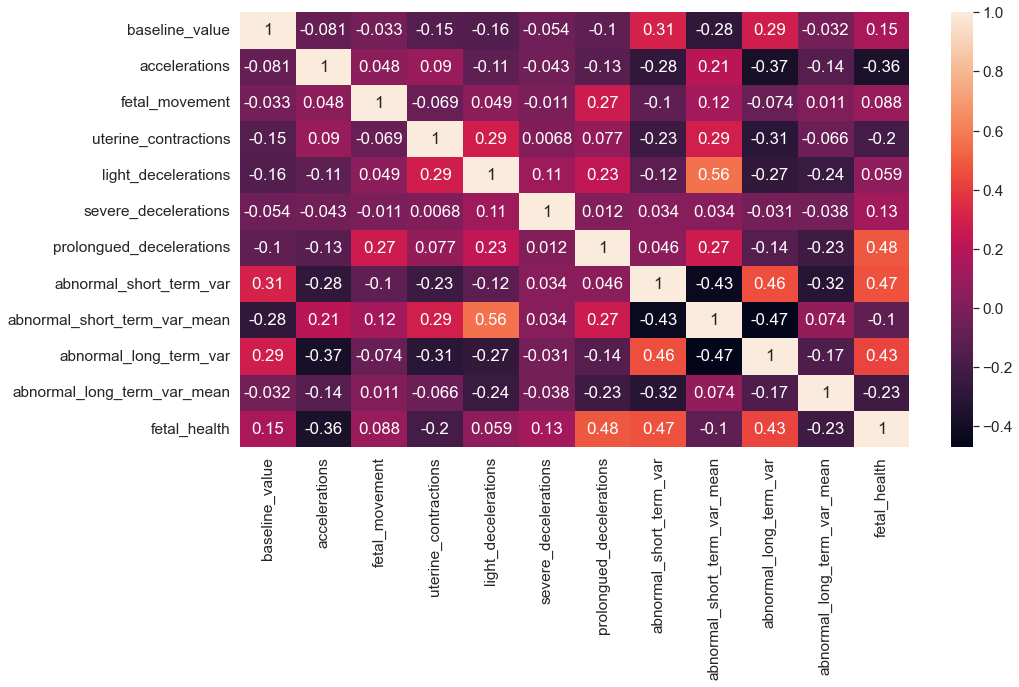

In [12]:
# Correlation heatmap 
plt.figure(figsize=(15, 8))
sns.set(font_scale=1.4)
ax = sns.heatmap(health.corr(), annot=True, cmap='rocket')

In reality, since action should be taken for both 'suspect' and 'pathological' classes in the CTGs, it is reasonable to combine the two classes into one single class 'abnormal'. This reduces the problem to a binary classification problem.

In [13]:
# Replace the classes '0', '1' and '2' with 'normal', 'suspect', 'pathological'
# Aggregate the classes 'suspect' and 'pathological' into 'abnormal'
health['fetal_health'] = health['fetal_health'].replace([1, 2, 3], ['normal', 'abnormal', 'abnormal'])

health['fetal_health'].head()

0    abnormal
1      normal
2      normal
3      normal
4      normal
Name: fetal_health, dtype: object

abnormal     471
normal      1655
Name: fetal_health, dtype: int64


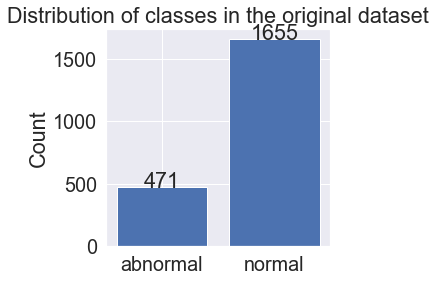

In [22]:
# Inspect the distribution of classes
class_count = health['fetal_health'].value_counts().sort_index(ascending=True)
print(class_count)

plt.figure(figsize=(4, 4))
plt.bar(class_count.index, class_count.values)

for i in range(len(class_count.values)):
    plt.text(class_count.index[i], class_count.values[i], str(class_count.values[i]), ha='center')

plt.title('Distribution of classes in the original dataset')
plt.ylabel('Count')
plt.show()

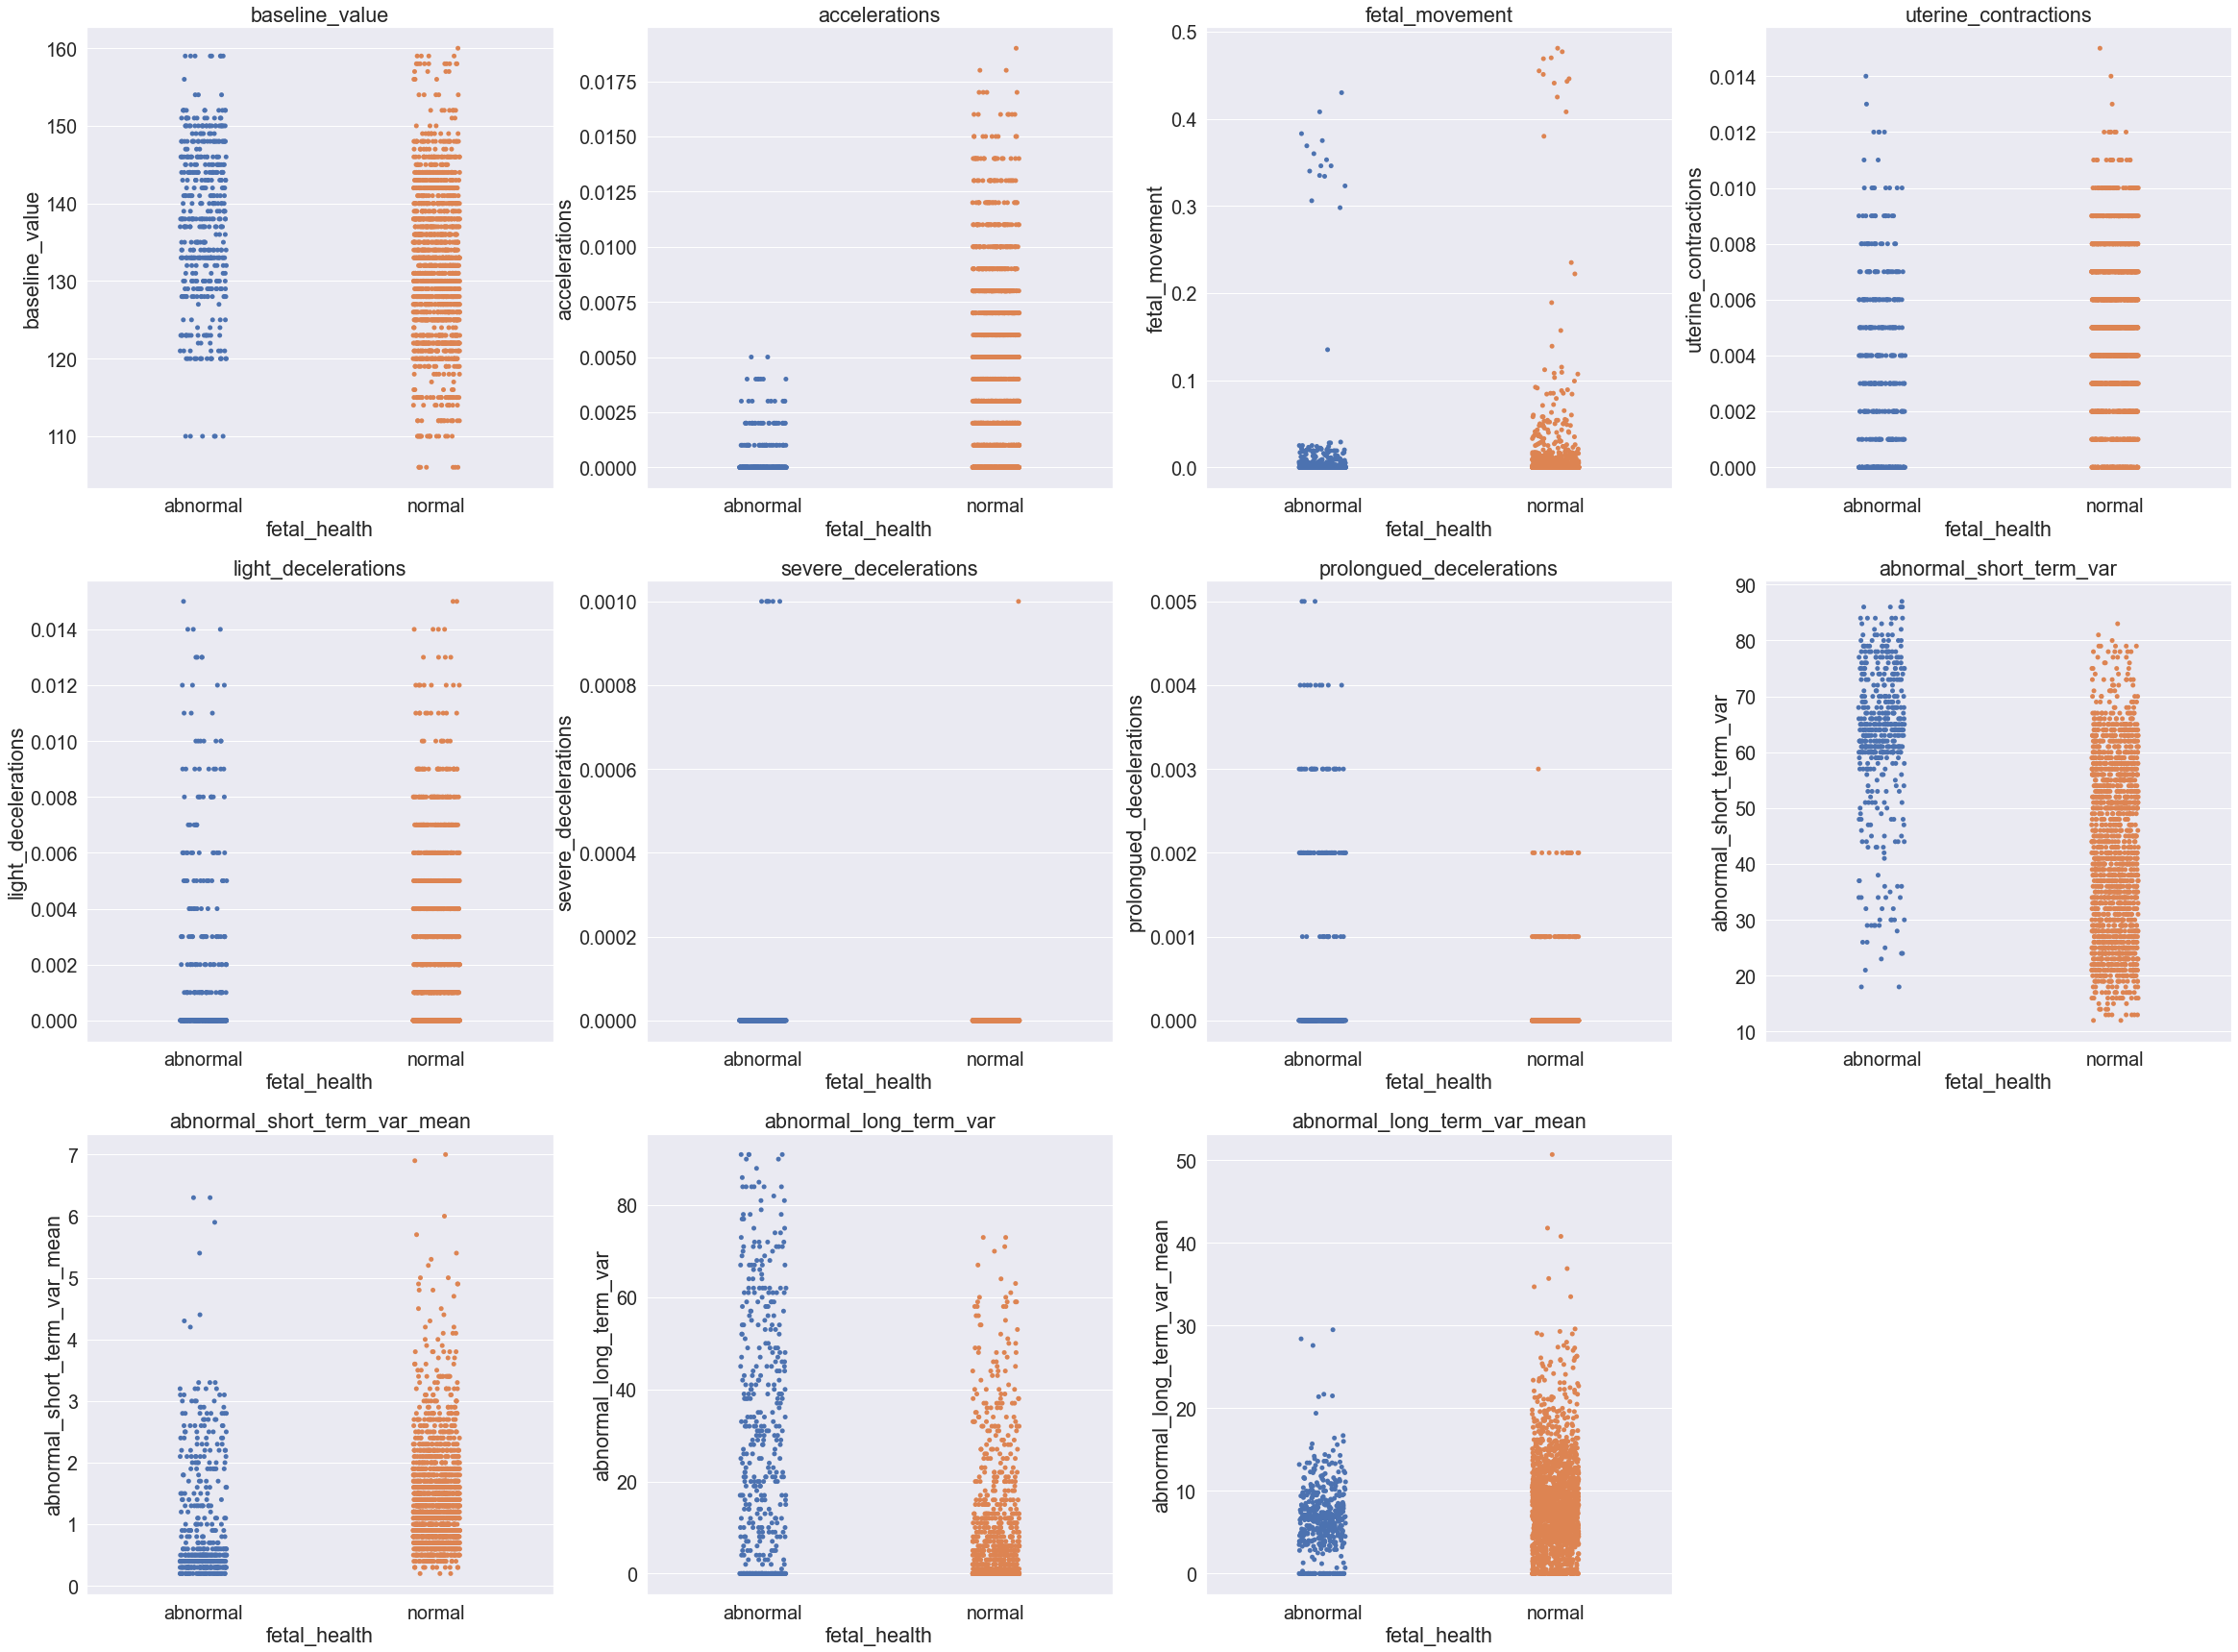

In [15]:
# Stripplot for each feature
n = 1  #initialize plot number
plt.figure(figsize=(40, 30))
sns.set(font_scale=1.8)
for i in health.iloc[:, 0:-1]:
    plt.subplot(3, 4, n)
    ax = sns.stripplot(x=health['fetal_health'], y=health[i], data=health)
    plt.title(i)
    n += 1

Since the data is imbalanced, we can perform Synthetic Minority Oversampling Technique (SMOTE) to oversample the minority classes. We first split the data to training and testing set, and apply SMOTE on the training set.

In [16]:
# Import library
from sklearn.model_selection import train_test_split

# Define the features and classes
X = health.iloc[:, 0:10]
y = health.iloc[:, 11]

# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1, stratify=y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1488, 10) (1488,) (638, 10) (638,)


In [17]:
# Class distribution in training and testing set
print('Trainig set:')
print(y_train.value_counts())
print('Testing set:')
print(y_test.value_counts())

Trainig set:
normal      1158
abnormal     330
Name: fetal_health, dtype: int64
Testing set:
normal      497
abnormal    141
Name: fetal_health, dtype: int64


Trainig set:
abnormal    1158
normal      1158
Name: fetal_health, dtype: int64
abnormal    1158
normal      1158
Name: fetal_health, dtype: int64


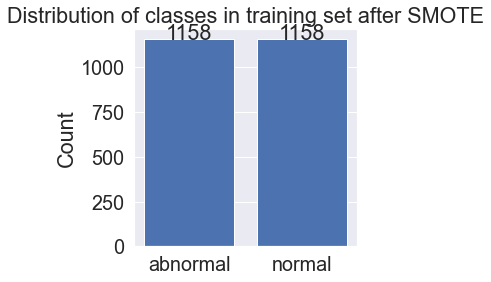

In [24]:
# Import libraries
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Apply SMOTE on trainig set
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

# Check the number of instances for each class after SMOTE
print('Trainig set:')
print(y_train.value_counts())

# Inspect the distribution of classes
smote_class_count = y_train.value_counts().sort_index(ascending=True)
print(smote_class_count)

# Bar plot to show the class distribution
plt.figure(figsize=(4, 4))
plt.bar(smote_class_count.index, smote_class_count.values)

for i in range(len(smote_class_count.values)):
    plt.text(smote_class_count.index[i], smote_class_count.values[i], str(smote_class_count.values[i]), ha='center')

plt.title('Distribution of classes in training set after SMOTE')
plt.ylabel('Count')
plt.show()

In [19]:
# Combine training features and classes
training_set = pd.concat([X_train, pd.DataFrame(y_train)], axis=1)
print(training_set.head())

# Export training set as csv file
training_set.to_csv('training_set.csv')

   baseline_value  accelerations  fetal_movement  uterine_contractions  \
0           147.0          0.000           0.000                 0.002   
1           125.0          0.000           0.000                 0.007   
2           134.0          0.008           0.001                 0.009   
3           130.0          0.000           0.009                 0.002   
4           137.0          0.002           0.000                 0.002   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.002                   0.0                       0.0   
1                0.008                   0.0                       0.0   
2                0.005                   0.0                       0.0   
3                0.000                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_var  abnormal_short_term_var_mean  \
0                     71.0                        

In [20]:
# Combine testing features and classes
testing_set = pd.concat([X_test, pd.DataFrame(y_test)], axis=1)
testing_set = testing_set.reset_index()
print(testing_set.head())


   index  baseline_value  accelerations  fetal_movement  uterine_contractions  \
0   2046           128.0          0.000           0.007                 0.008   
1     90           139.0          0.002           0.002                 0.002   
2    504           128.0          0.008           0.014                 0.004   
3    743           142.0          0.001           0.000                 0.005   
4    264           127.0          0.000           0.000                 0.005   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.009                   0.0                       0.0   
1                0.000                   0.0                       0.0   
2                0.000                   0.0                       0.0   
3                0.011                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_var  abnormal_short_term_var_mean  \
0       

In [21]:
# Delete index column
testing_set = testing_set.drop(columns = 'index')

# Export testing set as csv file
testing_set.to_csv('testing_set.csv')